# K nearest Neighbors 

## Importing the Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from scipy.stats import pearsonr

## Importing the dataset

In [19]:
dataset = pd.read_csv('/data/private/VM/data/ML_training&testing_v01shuffled_20220317.csv')
dataset

,Year,DOY,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,Clay,Elevation,lat,lon,OMC,Porosity,Sand,Silt,Preci,Soil Moisture
0,2015,222,0.120117,-0.002280,29.12,31.14,0.183740,11.589293,23.996123,8.695007,19.700001,1752.627563,40.078119,-112.361396,3.56868,0.490566,37.700001,42.700001,0.000853,0.092000
1,2010,177,0.515586,-0.004072,19.55,8.68,0.685505,14.058996,21.684099,14.624732,22.799999,153.939468,48.726702,3.203102,6.65464,0.509434,10.400000,66.800003,0.000849,0.001500
2,2012,79,0.238310,-0.002077,8.04,10.50,0.410580,14.444198,8.660008,4.510628,23.799999,73.877228,43.717169,3.857831,6.98220,0.490566,29.799999,46.400002,0.321031,0.123435
3,2013,95,0.188224,-0.002522,12.32,29.50,0.352700,15.731341,7.477071,13.977669,31.600000,213.627564,40.052801,-88.372904,6.39604,0.471698,8.800000,59.599998,0.000435,0.394130
4,2007,299,0.435490,-0.001802,8.66,7.38,0.882154,12.428805,7.207212,52.144912,40.299999,192.723587,45.249999,-123.280000,16.34352,0.539623,15.800000,43.799999,0.001720,0.387500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469429,2016,197,0.309898,-0.001307,25.57,15.68,0.588824,13.894586,20.975506,1.797110,14.300000,2563.126221,35.700000,-105.809995,11.55080,0.581132,59.900002,25.799999,0.126868,0.001000
469430,2011,250,0.157988,-0.000601,22.23,32.08,0.256247,11.722256,22.917156,0.250635,17.000000,661.658142,47.759130,-118.745460,4.18932,0.516981,31.100000,51.900002,0.000858,0.072000
469431,2013,147,0.030116,-0.000081,36.09,19.04,0.047282,11.334223,29.584159,0.885216,25.400000,27.083851,36.602000,-117.144897,0.99992,0.520755,42.900002,31.700001,0.000852,0.020667
469432,2013,192,0.518430,-0.003983,25.18,13.34,0.684706,12.998422,24.711874,5.491154,19.799999,246.750183,39.866798,-93.147005,5.56852,0.464151,9.900000,70.199997,0.000854,0.181333


In [20]:
dataset.columns

Index(['Year', 'DOY', 'EVI', 'Evapo', 'LST_Daily', 'LST_Diff', 'NDVI', 'TI',
       'T_air', 'API', 'Clay', 'Elevation', 'lat', 'lon', 'OMC', 'Porosity',
       'Sand', 'Silt', 'Preci', 'Soil Moisture'],
      dtype='object')

## Construction of the matrix of characteristics (X) and the dependent variable vector (y)

In [21]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Division of the dataset into the Training Set and the Test Set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
X_train.shape

(352075, 19)

In [24]:
X_test.shape

(117359, 19)

In [25]:
X_train, X_test

(array([[2.01200000e+03, 2.18000000e+02, 1.30008333e-01, ...,
         2.87999992e+01, 4.39000015e+01, 4.41074000e-04],
        [2.01100000e+03, 2.26000000e+02, 4.82789881e-01, ...,
         3.97000008e+01, 4.40999985e+01, 4.35114000e-04],
        [2.01300000e+03, 2.47000000e+02, 2.82306548e-01, ...,
         3.50999985e+01, 4.17999992e+01, 2.63536535e+00],
        ...,
        [2.01300000e+03, 2.03000000e+02, 1.10332738e-01, ...,
         5.77000008e+01, 2.45000000e+01, 0.00000000e+00],
        [2.01000000e+03, 1.09000000e+02, 4.05214290e-02, ...,
         4.29000015e+01, 3.17000008e+01, 8.52346000e-04],
        [2.01000000e+03, 2.26000000e+02, 4.27702679e-01, ...,
         2.41000004e+01, 6.64000015e+01, 4.26173000e-04]]),
 array([[2.01500000e+03, 2.18000000e+02, 2.38563095e-01, ...,
         1.28999996e+01, 6.25999985e+01, 1.29044000e-03],
        [2.01400000e+03, 2.39000000e+02, 4.99024987e-01, ...,
         1.89999998e+00, 7.96999969e+01, 4.26173000e-04],
        [2.01400000e+03, 

In [26]:
X_test1 = X_test

## Very important: Feature scaling of X (range -3 to 3)

### Obs: Fit_transform only applied to X_train to prevent data leaking

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
np.concatenate((X_train,X_test)).std(),np.concatenate((X_train,X_test)).mean()

(1.0007581037794264, -2.6934007929017374e-05)

In [29]:
X_train.mean(), X_train.std(),X_test.mean(),X_test.std()

(8.623456396466387e-14,
 1.0000000000000624,
 -0.0001077355729727705,
 1.0030289599840096)

## Construction and training of the regression model over the training set


In [34]:
from sklearn.ensemble import GradientBoostingRegressor  #"GradientBoostingRegressor" class from "ensemble" module 
regressor = GradientBoostingRegressor(n_estimators=120, max_depth=5, learning_rate=0.5) #regressor object
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=5, n_estimators=120)

In [31]:
import pickle

# with open('/data/private/VM/trainedModel/GB.pkl', 'wb') as f:
#     pickle.dump(regressor, f)
# with open('/data/private/VM/trainedModel/GB.pkl', 'rb') as f: #2022年5月左右训练的模型，现在再load会报错，好像是python版本的问题。重新训练。
#     regressor = pickle.load(f)
# regressor
# regressor.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DummyRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GradientBoostingRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your o

GradientBoostingRegressor(learning_rate=0.5, max_depth=5, n_estimators=120)

## Prediction of Test set results (obtaining y_pred)

In [36]:
import datetime
starttime_testing = datetime.datetime.now()
starttime_testing

datetime.datetime(2023, 3, 8, 10, 43, 56, 22507)

In [37]:
y_pred = regressor.predict(X_test) 

In [38]:
endtime_testing = datetime.datetime.now()
print(endtime_testing)
print("running time of testing")
print(endtime_testing - starttime_testing)

2023-03-08 10:43:58.402648
running time of testing
0:00:02.380141


In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2score= r2_score(y_test, y_pred)
print('R2score is',r2score )
MAE=mean_absolute_error(y_test, y_pred)
print('MAE is',MAE)
MSE=mean_squared_error(y_test, y_pred)
print('MSE is',MSE)
RMSE = np.sqrt(MSE)
print('RMSE is',RMSE)
r = pearsonr(y_test, y_pred)
print('r',r)

R2score is 0.7976747536827081
MAE is 0.037085512480616416
MSE is 0.002516403893968467
RMSE is 0.05016377073116082
r (0.8932255179716784, 0.0)


Text(0.1, 0.37, 'r: 0.89')

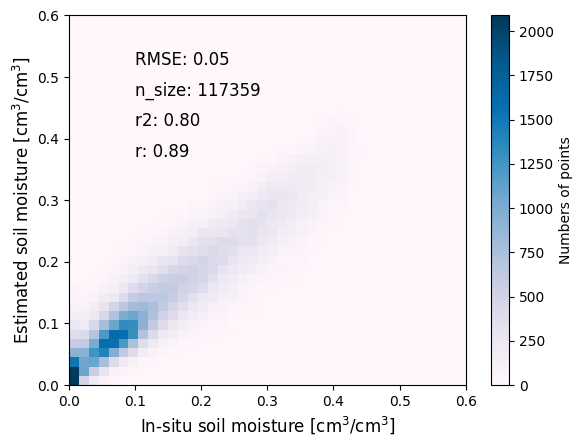

In [41]:
from pylab import hist2d
# show the validation of the test set
plt.figure()
# label of the axis.
plt.xlabel('In-situ soil moisture [$\mathregular{cm^3}$/$\mathregular{cm^3}$]', fontsize=12)
plt.ylabel('Estimated soil moisture [$\mathregular{cm^3}$/$\mathregular{cm^3}$]', fontsize=12)
# plot the data with the density (number of pixels)
h = hist2d(list(y_test), list(y_pred), bins=40, cmap='PuBu',
           range=[[0, 0.6], [0, 0.6]])
cb = plt.colorbar()
cb.set_label('Numbers of points')
# Add 1:1 line
x = np.arange(0, 0.6, 0.1, dtype=float)
y = x
# Add the information of RMSE and r on the figure.
plt.text(0.1, 0.52, 'RMSE: %.2f' % RMSE, fontdict={'size': 12})
plt.text(0.1, 0.47, 'n_size: %d' % len(y_test), fontdict={'size': 12})
plt.text(0.1, 0.42, 'r2: %.2f' % r2score, fontdict={'size': 12})
plt.text(0.1, 0.37, 'r: %.2f' % r[0], fontdict={'size': 12})
# plt.savefig("Kneighbors.png")

In [42]:
pd.DataFrame({"insitu":y_test,"predicted":y_pred},columns=["insitu","predicted"]).to_csv(path_or_buf=r'predictedSSM/test_random_GB.csv', sep=',', index=False)

## per site

In [319]:
def get_site_stats(row):
    y_test = row['Soil Moisture']
    y_pred = row['Predicted']
    metrics_i = {
        'r2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'r': np.corrcoef(y_test, y_pred)[0, 1],
        'n_size': y_test.size
    }
    return pd.Series(metrics_i)

In [320]:
hh = pd.DataFrame(X_test1)
hh.columns = dataset.columns[0:-1]
hh['Predicted'] = y_pred
hh['Soil Moisture'] = y_test
hh

,Year,DOY,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,...,Elevation,lat,lon,OMC,Porosity,Sand,Silt,Preci,Predicted,Soil Moisture
0,2015.0,218.0,0.238563,-0.003556,31.41,16.00,0.389563,13.639832,29.109518,22.532099,...,313.751617,36.605398,-97.487801,3.49972,0.430189,12.900000,62.599998,0.001290,0.137738,0.144783
1,2014.0,239.0,0.499025,-0.003532,24.54,9.66,0.798357,15.972043,27.561245,19.036508,...,92.272484,34.255002,-89.873498,6.32708,0.524528,1.900000,79.699997,0.000426,0.158926,0.163696
2,2014.0,205.0,0.163733,-0.001807,26.83,27.00,0.265293,12.178329,18.385873,6.103567,...,1795.768799,45.043467,-112.524095,3.68936,0.498113,38.900002,38.200001,0.006765,0.048400,0.051000
3,2016.0,41.0,0.048950,-0.000041,17.09,3.00,0.083452,10.144185,18.029755,2.338439,...,504.757355,34.157557,-115.145101,0.94820,0.471698,55.500000,28.799999,0.000852,0.121389,0.076000
4,2012.0,264.0,0.285447,-0.000763,16.24,17.74,0.458675,10.988085,14.592750,3.125408,...,2713.882568,39.010000,-111.580001,21.61896,0.569811,33.099998,41.599998,0.001288,0.131045,0.146917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117354,2014.0,364.0,0.150423,-0.001551,6.32,9.26,0.382683,11.787125,6.007813,44.415241,...,236.017914,38.150182,-120.785467,5.18924,0.490566,40.799999,38.000000,0.109795,0.343012,0.410058
117355,2013.0,237.0,0.192040,-0.000395,23.83,20.64,0.266993,15.176023,19.459036,0.176301,...,762.167541,41.300100,-5.247038,5.77540,0.494340,60.700001,18.100000,0.000000,0.124496,0.075375
117356,2012.0,51.0,0.285630,-0.001408,6.11,12.20,0.507140,12.975164,4.544440,42.463486,...,247.596176,34.900002,-86.532998,6.72360,0.501887,9.300000,64.699997,0.000000,0.354716,0.384813
117357,2011.0,272.0,0.273875,-0.001003,14.99,10.72,0.648324,11.806067,14.673877,7.967519,...,3026.673340,38.480000,-109.269995,18.29164,0.600000,37.900002,39.299999,0.000871,0.124915,0.125958


In [ ]:
res_testing = hh.groupby([ 'lat', 'lon'], as_index=False).apply(get_site_stats)

In [317]:
res_testing.to_csv(r'result/GB_testing_per_station.csv')

## Prediction of validating set results (obtaining y_pred_validating)

In [43]:
dataset_val = pd.read_csv('/data/private/VM/data/ML_validating_v01_20220303.csv')
dataset_val.head()

,station,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,Clay,...,ESA-CCI,lat,lon,network,OMC,Porosity,Sand,Silt,Soil Moisture,Preci
0,SAA111,0.267585,-0.002658,13.80,5.34,0.503435,9.724592,10.782256,42.469012,9.4,...,0.256715,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.175417,0.121573
1,SAA111,0.264823,-0.003970,22.36,13.26,0.497070,9.724592,15.129432,38.514693,9.4,...,0.258126,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.172500,0.001892
2,SAA111,0.256537,-0.003107,18.15,11.12,0.477974,9.724592,16.073048,41.956012,9.4,...,0.287426,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.179500,6.832266
3,SAA111,0.220529,-0.003018,10.73,-11.00,0.403011,9.724592,14.346681,41.557064,9.4,...,0.254694,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.179375,0.021294
4,SAA111,0.213499,-0.003174,14.76,5.98,0.396828,9.724592,14.414658,42.532913,9.4,...,0.243986,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.176958,0.166529


In [44]:
dataset_val.shape

(199886, 22)

In [45]:
dataset_val.station.value_counts()

AdamsRanch#1            583
WalnutGulch#1           548
NDAP-SCGN               516
SIERRABLANCA            469
PORTALESAP              447
                       ... 
BaoxieWeatherStation      1
MOORECREEKBRIDGE          1
Coos-Bay-8-SW             1
MascomaRiver              1
Topeka                    1
Name: station, Length: 1550, dtype: int64

In [46]:
dataset_val.columns

Index(['station', 'EVI', 'Evapo', 'LST_Daily', 'LST_Diff', 'NDVI', 'TI',
       'T_air', 'API', 'Clay', 'Date', 'Elevation', 'ESA-CCI', 'lat', 'lon',
       'network', 'OMC', 'Porosity', 'Sand', 'Silt', 'Soil Moisture', 'Preci'],
      dtype='object')

In [47]:
dataset2=pd.to_datetime(dataset_val['Date'])
DOY=dataset2.dt.dayofyear #create a Series "day", where the day of the year is stored
#also allows for weekofyear
Year= dataset2.dt.year #create a "year series"
dataset_val.insert(0, 'DOY', DOY) #insert the day series to the beggining of the dataset
dataset_val.insert(0, 'Year', Year)#insert the year series to the beggining of the dataset
dataset_val.drop(labels=['Date'], axis=1,inplace = True) #eliminate the date column

In [48]:
Xy = dataset_val[dataset.columns]
Xy

,Year,DOY,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,Clay,Elevation,lat,lon,OMC,Porosity,Sand,Silt,Preci,Soil Moisture
0,2016,178,0.267585,-0.002658,13.80,5.34,0.503435,9.724592,10.782256,42.469012,9.400000,468.604279,68.330194,27.550618,37.66940,0.762264,55.500000,35.099998,0.121573,0.175417
1,2016,179,0.264823,-0.003970,22.36,13.26,0.497070,9.724592,15.129432,38.514693,9.400000,468.604279,68.330194,27.550618,37.66940,0.762264,55.500000,35.099998,0.001892,0.172500
2,2016,182,0.256537,-0.003107,18.15,11.12,0.477974,9.724592,16.073048,41.956012,9.400000,468.604279,68.330194,27.550618,37.66940,0.762264,55.500000,35.099998,6.832266,0.179500
3,2016,197,0.220529,-0.003018,10.73,-11.00,0.403011,9.724592,14.346681,41.557064,9.400000,468.604279,68.330194,27.550618,37.66940,0.762264,55.500000,35.099998,0.021294,0.179375
4,2016,202,0.213499,-0.003174,14.76,5.98,0.396828,9.724592,14.414658,42.532913,9.400000,468.604279,68.330194,27.550618,37.66940,0.762264,55.500000,35.099998,0.166529,0.176958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199881,2007,243,0.240733,-0.004534,24.88,9.90,0.387445,15.238001,24.888287,8.485890,24.700001,129.928635,38.130001,-88.920000,5.03408,0.475472,5.900000,69.300003,0.000435,0.144600
199882,2007,256,0.227114,-0.003647,18.90,14.94,0.375854,15.238001,20.006017,30.926773,24.700001,129.928635,38.130001,-88.920000,5.03408,0.475472,5.900000,69.300003,0.000858,0.157600
199883,2007,304,0.223807,-0.001522,12.57,8.64,0.392707,15.238001,13.731508,35.938500,24.700001,129.928635,38.130001,-88.920000,5.03408,0.475472,5.900000,69.300003,0.000000,0.353900
199884,2008,197,0.465335,-0.005154,25.11,7.40,0.626214,15.238001,26.364821,45.631101,24.700001,129.928635,38.130001,-88.920000,5.03408,0.475472,5.900000,69.300003,0.001716,0.372900


In [49]:
X_validating = Xy.iloc[:, :-1].values
y_validating = Xy.iloc[:, -1].values
X_validating = sc.transform(X_validating)
X_validating

array([[ 1.47493722e+00, -3.38055770e-01,  2.12423800e-02, ...,
         8.03556515e-01, -1.51644677e-01, -1.14538440e-01],
       [ 1.47493722e+00, -3.24606147e-01, -7.55387217e-04, ...,
         8.03556515e-01, -1.51644677e-01, -2.26396683e-01],
       [ 1.47493722e+00, -2.84257278e-01, -6.67486730e-02, ...,
         8.03556515e-01, -1.51644677e-01,  6.15756472e+00],
       ...,
       [-1.07076807e+00,  1.35659671e+00, -3.27405917e-01, ...,
        -2.08455945e+00,  2.52204755e+00, -2.28165445e-01],
       [-7.87911927e-01, -8.25129351e-02,  1.59608638e+00, ...,
        -2.08455945e+00,  2.52204755e+00, -2.26562012e-01],
       [-7.87911927e-01, -9.59625580e-02,  3.67307950e+00, ...,
         1.17039378e+00, -1.23050274e+00, -2.02881884e-01]])

In [50]:
X_validating.mean(),X_validating.std()

(0.07552357740355688, 1.0366578329944045)

In [51]:
X_validating.mean(),X_validating.std()

(0.07552357740355688, 1.0366578329944045)

In [52]:
import datetime
starttime_validating = datetime.datetime.now()
starttime_validating

datetime.datetime(2023, 3, 8, 10, 45, 52, 42724)

In [53]:
y_pred_validating = regressor.predict(X_validating) 

In [54]:
endtime_validating = datetime.datetime.now()
print(endtime_validating)
print("running time of validating")
print(endtime_validating - starttime_validating)

2023-03-08 10:45:55.435008
running time of validating
0:00:03.392284


In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2score= r2_score(y_validating, y_pred_validating)
print('R2score is',r2score )
MAE=mean_absolute_error(y_validating, y_pred_validating)
print('MAE is',MAE)
MSE=mean_squared_error(y_validating, y_pred_validating)
print('MSE is',MSE)
RMSE = np.sqrt(MSE)
print('RMSE is',RMSE)
r = pearsonr(y_validating, y_pred_validating)
print('r',r)

R2score is 0.6947991826174735
MAE is 0.04499961704627784
MSE is 0.0038046067990624185
RMSE is 0.06168149478621946
r (0.8352699057508878, 0.0)


In [57]:
pd.DataFrame({"insitu":y_validating,"predicted":y_pred_validating},columns=["insitu","predicted"]).to_csv(path_or_buf=r'predictedSSM/test_temporal_GB.csv', sep=',', index=False)

## Per site

In [517]:
dataset_val.columns

Index(['Year', 'DOY', 'station', 'EVI', 'Evapo', 'LST_Daily', 'LST_Diff',
       'NDVI', 'TI', 'T_air', 'API', 'Clay', 'Elevation', 'ESA-CCI', 'lat',
       'lon', 'network', 'OMC', 'Porosity', 'Sand', 'Silt', 'Soil Moisture',
       'Preci', 'Predicted'],
      dtype='object')

In [518]:
dataset_val['Predicted'] = y_pred_validating

In [519]:
# small check
get_site_stats(dataset_val)

r2             0.664892
MAE            0.046739
MSE            0.004177
RMSE           0.064633
r              0.818735
n_size    199886.000000
dtype: float64

In [ ]:
res_val = dataset_val.groupby(['station', 'lat', 'lon'], as_index=False).apply(get_site_stats)

In [521]:
res_val.to_csv(r'result/GB1_validation_per_station.csv')

## Prediction of independent evaluation results (obtaining y_pred_independent)

In [61]:
import datetime
starttime_independent = datetime.datetime.now()
starttime_independent

datetime.datetime(2023, 3, 8, 10, 56, 47, 387394)

In [62]:
glob.glob("/data/private/VM/data/Independent_stations_v01cleaned0509/*.csv")[0:2]

['/data/private/VM/data/Independent_stations_v01cleaned0509/Independent_SNOTEL_MERCHANTVALLEY.csv',
 '/data/private/VM/data/Independent_stations_v01cleaned0509/Independent_HiWATER-EHWSN_SoilNET-044.csv']

In [63]:
rs = []
r2scores = []
RMSEs = []
networks = []
stations = []
lons = []
lats = []
sizes = []
for files in glob.glob("/data/private/VM/data/Independent_stations_v01cleaned0509/*.csv"):
    independentdataset = pd.read_csv(files)
    size = len(independentdataset['network'])
    network = independentdataset['network'][0]
    station = str(independentdataset['station'][0])
    independentdataset.rename(columns={'Lon':'lon','Lat':'lat'},inplace=True)
    lon = independentdataset['lon'][0]
    lat = independentdataset['lat'][0]
    independentdataset = independentdataset.drop('network', axis=1)
    independentdataset = independentdataset.drop('station', axis=1)
    X_independent = independentdataset.iloc[:, :-1].values
    # print(X_independent)
    y_independent = independentdataset.iloc[:, -1].values
    # print(y_independent)
    X_independent = sc.transform(X_independent)
    y_pred_independent = regressor.predict(X_independent) 
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    r2score= r2_score(y_independent, y_pred_independent)
    # print('R2score is',r2score)
    MAE=mean_absolute_error(y_independent, y_pred_independent)
    MSE=mean_squared_error(y_independent, y_pred_independent)
    RMSE = np.sqrt(MSE)
    # print('RMSE is',RMSE)
    r2scores.append(r2score)
    RMSEs.append(RMSE)
    r = pearsonr(y_independent, y_pred_independent)
    rs.append(r[0])
    # print('r',r)
    networks.append(network)
    stations.append(station)
    lons.append(lon)
    lats.append(lat)
    sizes.append(size)
    pd.DataFrame({"insitu":y_independent,"predicted":y_pred_independent},columns=["insitu","predicted"]).to_csv(path_or_buf=r'predictedSSM/GB/'+files.split('/')[-1], sep=',', index=False)
print('r',rs)
print('R2score is',r2scores)
print("RMSEs",RMSEs)
print('networks',networks)
print('stations',stations)
print('sizes',sizes)

r [0.22657926896578526, 0.15377884096088784, 0.4801053219340918, 0.28893085431272114, 0.23377014161999243, 0.775935730901462, 0.6839224054717976, 0.8935138959061946, 0.7456327707830256, 0.6191066934760747, 0.6030553502542242, 0.3254729422131521, 0.7184399955603559, 0.20297944749519486, 0.6755610402442436, 0.5733159799710957, 0.8450806993743055, 0.8327861693862985, 0.7203433375981634, 0.6097239550844895, 0.35200644799873715, 0.9602888738706109, 0.739067070604699, 0.7216841339629289, 0.5939118521304296, 0.8152659532035395, 0.7294721906669133, 0.4436970214530518, 0.788328189376164, 0.7017359791238038, 0.45232514771619126, 0.6033189836282784, 0.7458514768901875, 0.5084169527389845, 0.6100506086654023, -0.822986322358447, 0.7218201424728204, 0.8232012025272256, 0.5404161475466016, 0.6682357097593633, 0.6552452563760792, 0.7924856654859641, 0.8075357467209507, 0.7023837870340659, 0.342152295305313, 0.8994847694263114, -0.012621753116565599, 0.821678837372138, 0.5898906005683509, 0.2028522656

In [103]:
independentMetrics = pd.DataFrame(data=(networks,stations,lons,lats,rs,r2scores,RMSEs,sizes)).T
independentMetrics.columns = ['network','station','lon','lat','r','r2','RMSE','n_size']
print(independentMetrics.sort_values('station')) #
independentMetrics.sort_values('station').to_csv("/data/private/VM/result/independentMetrics_GB.csv", sep=',', index=False)

        network   station         lon        lat         r        r2  \
119        HOBE      2.07    9.033702  55.948198  0.583433 -1.705116   
44         HOBE      3.01    9.014202  55.880701  0.315798  -2.12394   
94         HOBE      3.05    8.917498  55.902501  0.598754 -3.555963   
34   WEGENERNET         6    15.85507  46.997262   0.42185 -6.974975   
89         SCAN  AAMU-jtg  -86.550001  34.782999  0.743174  0.530886   
..          ...       ...         ...        ...       ...       ...   
86    SOILSCAPE   node802 -120.797346  38.507191  0.851337  0.561231   
146   SOILSCAPE   node803 -120.798287  38.507254  0.792486 -1.538335   
10    SOILSCAPE   node816 -120.797881   38.50514  0.775295 -0.854778   
70    SOILSCAPE   node902 -120.905471  38.393511  0.955235  0.898676   
132   SOILSCAPE   node915 -120.906126   38.39125  0.823201  0.628757   

         RMSE n_size  
119  0.078775    165  
44   0.092815    150  
94   0.093238    144  
34   0.055539     30  
89   0.056414    725

In [97]:
endtime_independent = datetime.datetime.now()
print(endtime_independent)
print("running time of independent")
print(endtime_independent - starttime_independent)

2022-05-16 20:55:55.279977
running time of independent
0:00:06.926010
